In [1]:
import xarray as xr

In [ ]:
!ls -1 *.nc

In [ ]:
!ncdump -h system_5_seasonal-monthly-single-levels_2003_06_total_precipitation.nc

In [ ]:
ds = xr.open_dataset(
    "system_5_seasonal-monthly-single-levels_2003_06_total_precipitation.nc",
    decode_cf=False,
)
ds

In [ ]:
ds.tp.min()

In [ ]:
ds.tp.plot.hist(bins=100);

In [ ]:
(ds.tp == 0).sum(["time", "number"]).plot()

In [ ]:
(ds.tp == 0).sum(["time", "number"]).sel(latitude=0, method="nearest").plot()

In [ ]:
(ds.tp == 0).sum() / ds.tp.data.size

In [ ]:
ds = xr.open_dataset(
    "system_5_seasonal-monthly-single-levels_2003_06_total_precipitation.nc",
    decode_cf=True,
)
ds

In [ ]:
ds.tp.min()

In [ ]:
ds.tp.max()

In [ ]:
ds.tp.plot.hist(bins=100);

In [ ]:
import numpy as np

In [ ]:
np.log10(((ds.tp > 3.2) & (ds.tp < 3.5)).sum(["time", "number"]).diff("longitude")).plot()

In [9]:
may_be_valid  #.drop(["time", ])

<xarray.DataArray 'tp' (time: 215, number: 25, latitude: 181, longitude: 360)>
array([[[[ True,  True,  True, ...,  True,  True,  True],
         [ True,  True,  True, ...,  True,  True,  True],
         [ True,  True,  True, ...,  True,  True,  True],
         ...,
         [ True,  True,  True, ...,  True,  True,  True],
         [ True,  True,  True, ...,  True,  True,  True],
         [ True,  True,  True, ...,  True,  True,  True]],

        [[ True,  True,  True, ...,  True,  True,  True],
         [ True,  True,  True, ...,  True,  True,  True],
         [ True,  True,  True, ...,  True,  True,  True],
         ...,
         [ True,  True,  True, ...,  True,  True,  True],
         [ True,  True,  True, ...,  True,  True,  True],
         [ True,  True,  True, ...,  True,  True,  True]],

        [[ True,  True,  True, ...,  True,  True,  True],
         [ True,  True,  True, ...,  True,  True,  True],
         [ True,  True,  True, ...,  True,  True,  True],
         ...,
...
         ...,
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False]],

        [[False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ...,  True,  True,  True],
         ...,
         [ True,  True,  True, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False]],

        [[False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         ...,
         [ True,  True,  True, ...,  True,  True,  True],
         [ True,  True,  True, ..., False, False, False],
         [False, False, False, ..., False, False, False]]]])
Coordinates:
  * longitude  (longitude) float32 0.0 1.0 2.0 3.0 ... 356.0 357.0 358.0 359.0
  * latitude   (latitude) float32 90.0 89.0 88.0 87.0 ... -88.0 -89.0 -90.0
  * number     (number) int32 0 1 2 3 4 5 6 7 8 9 ... 16 17 18 19 20 21 22 23 24
  * time       (time) int32 906528 906552 906576 906600 ... 911616 911640 911664

In [10]:
ds = xr.open_dataset(
    "system_5_seasonal-monthly-single-levels_2003_06_total_precipitation.nc",
    decode_cf=False,
)
may_be_valid = (ds.tp != 0).drop(["time", ])  # int16
ds = xr.decode_cf(ds)  # now ds.tp is float32
ds["tp"] = ds.tp.where(may_be_valid)
ds

<xarray.Dataset>
Dimensions:    (longitude: 360, latitude: 181, number: 25, time: 215)
Coordinates:
  * longitude  (longitude) float32 0.0 1.0 2.0 3.0 ... 356.0 357.0 358.0 359.0
  * latitude   (latitude) float32 90.0 89.0 88.0 87.0 ... -88.0 -89.0 -90.0
  * number     (number) int32 0 1 2 3 4 5 6 7 8 9 ... 16 17 18 19 20 21 22 23 24
  * time       (time) datetime64[ns] 2003-06-02 2003-06-03 ... 2004-01-02
Data variables:
    tp         (time, number, latitude, longitude) float32 0.0007312 ... nan
Attributes:
    Conventions:  CF-1.6
    history:      2023-01-30 04:51:11 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

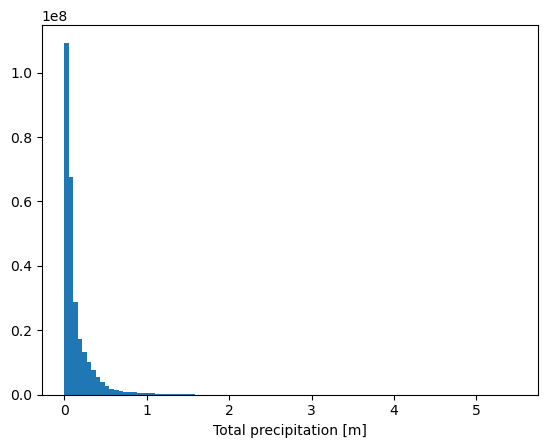

In [11]:
ds.tp.plot.hist(bins=100);

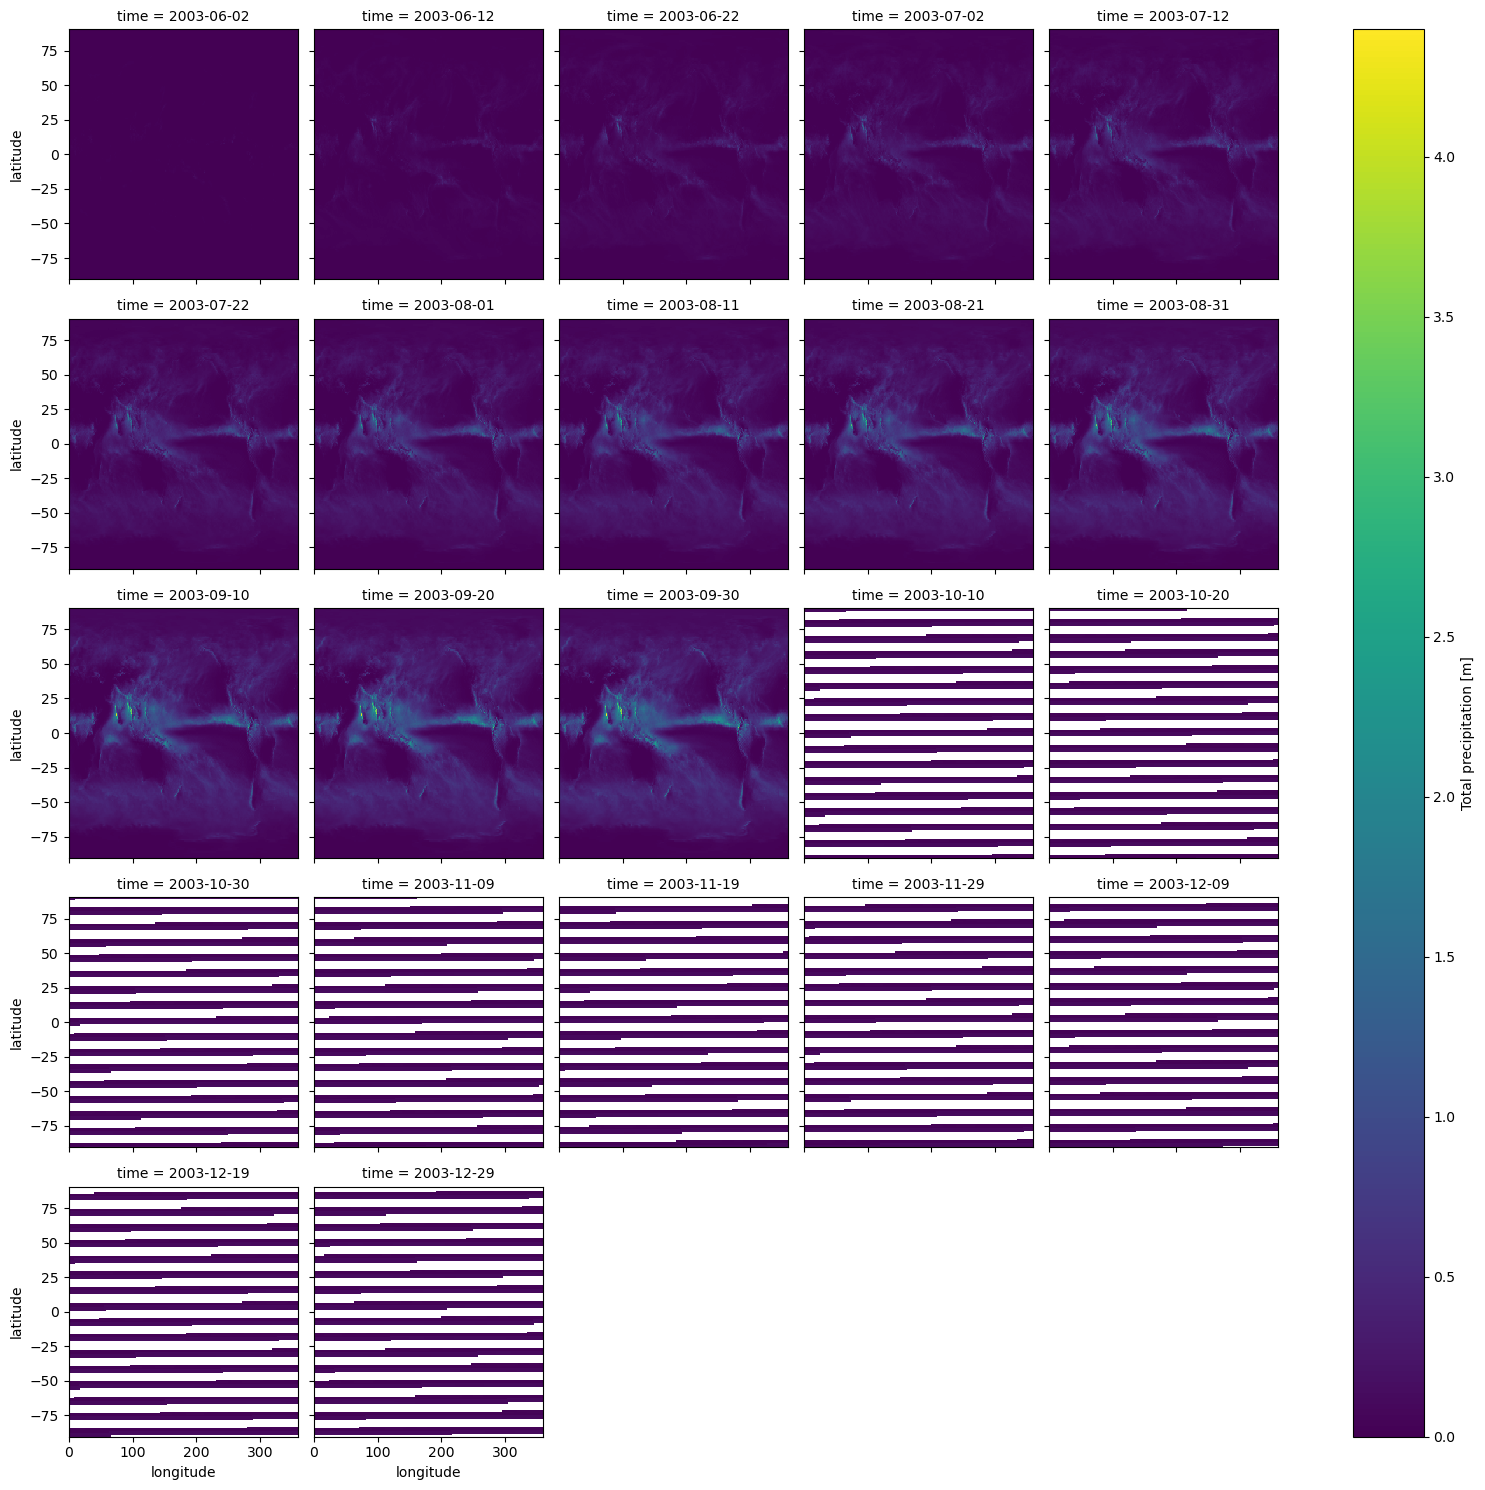

In [13]:
ds.tp.isel(number=15).isel(time=slice(None, None, 10)).plot(col="time", col_wrap=5)

In [ ]:
!ncdump -h system_5_seasonal-monthlya-single-levels_2003_06_total_precipitation_Redownload.nc